In [5]:
import kagglehub
path = kagglehub.dataset_download("lasaljaywardena/real-world-churn")


In [4]:
!pip install --upgrade kagglehub


In [6]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("lasaljaywardena/real-world-churn")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\SHAIVIK\.cache\kagglehub\datasets\lasaljaywardena\real-world-churn\versions\1


In [7]:
import os

# List files in the dataset directory
print(os.listdir(path))


['main.csv', 'raw_dump', 'test', 'train', 'usage_data']


In [9]:
import pandas as pd

# Update filename accordingly
df = pd.read_csv(os.path.join(path, "main.csv"))
df.head()


,customer_id,usage_type,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_81,Day_82,Day_83,Day_84,Day_85,Day_86,Day_87,Day_88,Day_89,Day_90
0,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_other,53.00,130.73,7.86,67.71,153.38,35.92,128.60,30.61,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_youtube_daily,98.50,0.00,284.82,150.05,0.00,261.89,44.89,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,50.28,0.0
2,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_facebook_daily,79.42,72.61,72.15,82.82,61.06,57.91,55.59,56.46,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
3,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_tiktok_daily,53.22,65.80,52.87,59.78,50.75,52.37,44.12,40.88,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
4,e9126f469646506b8e82b4214d075bf72d9d324d357650...,usage_app_whatsapp_daily,0.00,4.18,20.33,7.89,18.37,7.17,5.22,12.77,...,0.0,0.0,0.0,0.0,2.31,0.0,0.0,0.0,1.22,0.0


In [10]:
# Pivot app usage for each customer
pivot_df = df.melt(id_vars=['customer_id', 'usage_type'], var_name='day', value_name='usage')
agg_df = pivot_df.groupby(['customer_id', 'usage_type'])['usage'].sum().unstack(fill_value=0)

agg_df['total_usage'] = agg_df.sum(axis=1)
agg_df.reset_index(inplace=True)


In [11]:
# Assume churn = if last 15 days = 0 usage across all apps
last_days = [f"Day_{i}" for i in range(76, 91)]
df['sum_last_days'] = df[last_days].sum(axis=1)
df['is_churned'] = df['sum_last_days'] == 0


In [12]:
churn_df = df.groupby('customer_id')['is_churned'].max().reset_index()


In [13]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


ModuleNotFoundError: No module named 'shap'

In [14]:
!pip install shap


                                              0.0/544.4 kB ? eta -:--:--
     -                                     20.5/544.4 kB 640.0 kB/s eta 0:00:01
     --                                    41.0/544.4 kB 487.6 kB/s eta 0:00:02
     -------                              112.6/544.4 kB 939.4 kB/s eta 0:00:01
     --------                             122.9/544.4 kB 722.1 kB/s eta 0:00:01
     --------                             122.9/544.4 kB 722.1 kB/s eta 0:00:01
     -----------                          174.1/544.4 kB 655.4 kB/s eta 0:00:01
     -----------                          174.1/544.4 kB 655.4 kB/s eta 0:00:01
     ------------                         194.6/544.4 kB 562.0 kB/s eta 0:00:01
     --------------                       225.3/544.4 kB 573.4 kB/s eta 0:00:01
     --------------                       225.3/544.4 kB 573.4 kB/s eta 0:00:01
     --------------                       225.3/544.4 kB 573.4 kB/s eta 0:00:01
     --------------                       225.3

In [1]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


NameError: name 'model' is not defined

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\SHAIVIK\.cache\kagglehub\datasets\lasaljaywardena\real-world-churn\versions\1\main.csv")  # replace with your actual path

# Sum up daily usage per customer across all apps
daily_columns = [col for col in df.columns if col.startswith("Day_")]
agg_df = df.groupby("customer_id")[daily_columns].sum().reset_index()

# Optional: Add total usage, average, or standard deviation as features
agg_df["total_usage"] = agg_df[daily_columns].sum(axis=1)
agg_df["avg_daily_usage"] = agg_df[daily_columns].mean(axis=1)
agg_df["std_daily_usage"] = agg_df[daily_columns].std(axis=1)


In [5]:
df_melted = df.melt(id_vars=["customer_id", "usage_type"], 
                    var_name="day", value_name="usage")

# Pivot to get usage per app per customer
pivoted = df_melted.pivot_table(index="customer_id", 
                                columns="usage_type", 
                                values="usage", 
                                aggfunc="sum").reset_index()

pivoted.columns = ['customer_id'] + [f"total_{col}" for col in pivoted.columns[1:]]


In [6]:
import numpy as np
pivoted["churn"] = np.where(pivoted["total_usage_app_whatsapp_daily"] < 100, 1, 0)  # Example condition


In [7]:
from sklearn.model_selection import train_test_split

X = pivoted.drop(["customer_id", "churn"], axis=1)
y = pivoted["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12571
           1       1.00      1.00      1.00       430

    accuracy                           1.00     13001
   macro avg       1.00      1.00      1.00     13001
weighted avg       1.00      1.00      1.00     13001



In [9]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary Plot
shap.summary_plot(shap_values[1], X)  # class 1 = churn


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [10]:
type(shap_values), len(shap_values), shap_values[0].shape, X.shape


(numpy.ndarray, 65005, (12, 2), (65005, 12))

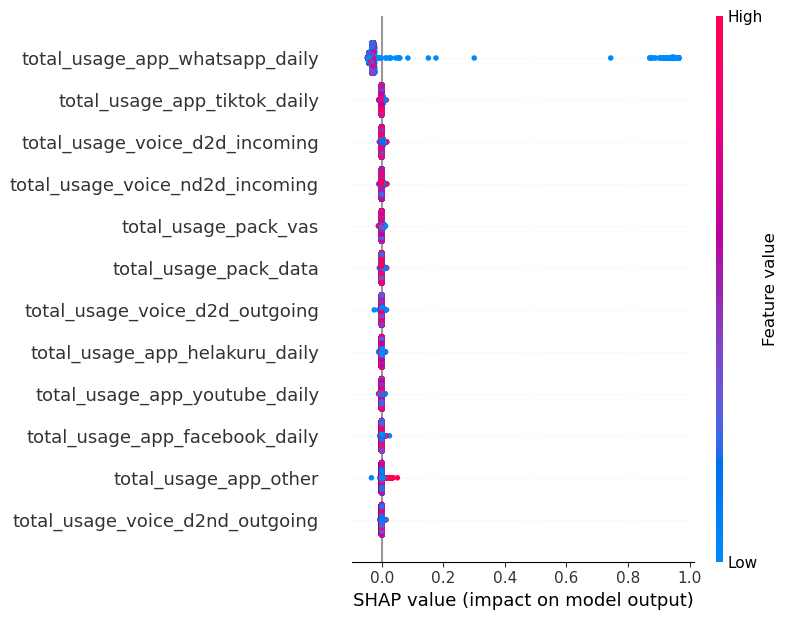

In [11]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# For binary classification, use class 1 (churned)
shap.summary_plot(shap_values[:, :, 1], X)


In [14]:
pivoted["prediction"] = model.predict(X)
pivoted["segment"] = np.select(
    [
        pivoted["prediction"] == 1,
        pivoted[X.columns].mean(axis=1) > 500
    ],
    ["At Risk", "Loyal"],
    default="Dormant"
)


In [15]:
pivoted.to_csv("customer_churn_segmented.csv", index=False)
